<a href="https://colab.research.google.com/github/Digital-Huge-Manitees/Digital_Huge_Manitees/blob/main/Term_Frequency_and_TF_IDF_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Term Frequency and TF-IDF
This notebook will cover the basics of NLP including term frequency and TF-IDF (term frequency, inverse document frequency).<br>
## Input
This will be .txt files created from the OCR notebook. 
See source files [here](https://github.com/Digital-Huge-Manitees/Digital_Huge_Manitees) on GitHub.

## Output
This will output csv files that can be used in Excel for further analysis.
There will also be a visualization of term frequency as .png format for use in reports.  

## References:

## Dependencies:



## Step 1: Link to your Google Drive account and create a new working directory
Wait, what?! You don't have a Google account? You'll need to create a Google account here: https://support.google.com/accounts/answer/27441?hl=en

### You will need to make sure you are signed into your Google account through your browser. Google Chrome works great for this. 

#### Step 1b: 
**Then - save a copy of this notebook (which is on GitHub) to your Google Drive.** Changes will be saved to your own copy.

#### Step 1c: 
When you run this cell, a dialog box will pop up asking you to select your Google account. Once this is complete, go to your Google Drive, and you should see a new folder called Colab Notebook and with in, OCR_Project_Folder. 
All of your work will be saved to this folder. 




In [1]:
#mount google drive here
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os 

# Set your working directory to a folder in your Google Drive. 
# the base Google Drive directory
root_dir = "/content/drive/My Drive/"
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/Term_Freq_Project_Folder/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # show me the current working directory

  print('\nYour working directory was changed to ' + root_dir + project_folder)

create_and_set_working_directory(project_folder)

#source: https://robertbrucecarter.com/writing/2020/06/setting-your-working-directory-to-google-drive-in-a-colab-notebook/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Term_Freq_Project_Folder/ did not exist but was created.

Your working directory was changed to /content/drive/My Drive/Colab Notebooks/Term_Freq_Project_Folder/


###  Step 1d: Now, you have a working directory!
- [ ] Move all the .txt files you created in the OCR directory to this new working directory Term_Freq_Project_Folder. 

## Step 2: Intall dependencies
By running the next three cells

In [ ]:

# Import libraries
import sys
import os
from google.colab import files

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use

### Optional: Change runtime type from CPU to GPU.
IF you are processing a long multipage PDF file, you may need more computational power. A GPU or TPU can process faster, however, lots of GPU usage may require you to upgrade your account. 
You can do this from the Runtime dropdown menu in the top bar and select 'Change Runtime type'. 
The cell below confirms your change. 

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11492512743432732918
 xla_global_id: -1]

## Step 3: 
Get all the txt files together. 

In [ ]:
"""
This only works on one file at a time. 
"""
path_of_the_directory = os.getcwd()
ext = ('.pdf')
for files in os.listdir(path_of_the_directory):
    if files.endswith(ext):
        print(files)
        pdf_file = files
    else:
        continue

"""
Not sure what the best solution is. Glob all together, or create a loop to go through each one. 
Or glob same years together?
Or just keep it simple and do one at a time. 
"""

dalhousiegazette_volume54_issue19_november_29_1922.pdf
/content/drive/MyDrive/Colab Notebooks/OCR_Project_Folder/dalhousiegazette_volume54_issue19_november_29_1922.pdf


In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords # import the stopwords corpus

## Step 6: NLP from .txt files
First we read in the text file

In [ ]:
# file-input.py
f = open('out_text.txt','r')
text = f.read()
print(text)
f.close()

Merchants unhappy

Fishermen sell directly to trawlers

by Earle McCurdy

VIRGIN ARM, Nfld.—The scene in Friday Bay off the shores of this small
northern Newfoundland fishing community was unusual to say the least.

About a dozen small, open boats were tied on at the side of a large
Bulgarian freezer trawler waiting to unload their catch of squid while
another similar factory ship was anchored only a few hundred yards away.

The same thing has been happening
in other bays around the island, as an
arrangement between the Newfoundland Fishermen, Food and Allied
Workers (NFFAW) and the Bulgarian
company Ribno Stopanstvo has been
previding a market for millions of
pounds of squid and mackerel caught
by Newfoundland fishermen.

By mid-August, the Bulgarians had
five ships, with a daily capacity
ranging from about 100,000 to
150,000 pounds of fish per boat,
anchored at various points around the
island to buy squid and mackerel from
local fishermen. And plans were afoot

early in September to

convert it all to lower case and print the length of the text file

In [ ]:
text = text.lower()
print(len(text))

66177


## Step 7: clean out stopwords
This removes stopwords from the text. You can print out the stopwords below if you'd like to see them. 

In [ ]:
text_tokens = nltk.word_tokenize(text)

In [ ]:
cleaned_tokens = [] # placeholder for the new tokens
for t in text_tokens:
    if t not in stopwords.words('english'): # check to see if it is in the stopwords corpus. If not, add it.
        cleaned_tokens.append(t) 

print(cleaned_tokens)

['merchants', 'unhappy', 'fishermen', 'sell', 'directly', 'trawlers', 'earle', 'mccurdy', 'virgin', 'arm', ',', 'nfld.—the', 'scene', 'friday', 'bay', 'shores', 'small', 'northern', 'newfoundland', 'fishing', 'community', 'unusual', 'say', 'least', '.', 'dozen', 'small', ',', 'open', 'boats', 'tied', 'side', 'large', 'bulgarian', 'freezer', 'trawler', 'waiting', 'unload', 'catch', 'squid', 'another', 'similar', 'factory', 'ship', 'anchored', 'hundred', 'yards', 'away', '.', 'thing', 'happening', 'bays', 'around', 'island', ',', 'arrangement', 'newfoundland', 'fishermen', ',', 'food', 'allied', 'workers', '(', 'nffaw', ')', 'bulgarian', 'company', 'ribno', 'stopanstvo', 'previding', 'market', 'millions', 'pounds', 'squid', 'mackerel', 'caught', 'newfoundland', 'fishermen', '.', 'mid-august', ',', 'bulgarians', 'five', 'ships', ',', 'daily', 'capacity', 'ranging', '100,000', '150,000', 'pounds', 'fish', 'per', 'boat', ',', 'anchored', 'various', 'points', 'around', 'island', 'buy', 'squi

#### only include alphanumeric characters
This only includes alphabetical characters and does not include numberals, punctuation, or other un-recognized characters. <br>
- [ ] This could be improved to use regex, so that there is the option of keeping numerals

In [ ]:
token_words = []
for w in cleaned_tokens:
    if w.isalpha():
        token_words.append(w)
    

In [ ]:
token_words

['merchants',
 'unhappy',
 'fishermen',
 'sell',
 'directly',
 'trawlers',
 'earle',
 'mccurdy',
 'virgin',
 'arm',
 'scene',
 'friday',
 'bay',
 'shores',
 'small',
 'northern',
 'newfoundland',
 'fishing',
 'community',
 'unusual',
 'say',
 'least',
 'dozen',
 'small',
 'open',
 'boats',
 'tied',
 'side',
 'large',
 'bulgarian',
 'freezer',
 'trawler',
 'waiting',
 'unload',
 'catch',
 'squid',
 'another',
 'similar',
 'factory',
 'ship',
 'anchored',
 'hundred',
 'yards',
 'away',
 'thing',
 'happening',
 'bays',
 'around',
 'island',
 'arrangement',
 'newfoundland',
 'fishermen',
 'food',
 'allied',
 'workers',
 'nffaw',
 'bulgarian',
 'company',
 'ribno',
 'stopanstvo',
 'previding',
 'market',
 'millions',
 'pounds',
 'squid',
 'mackerel',
 'caught',
 'newfoundland',
 'fishermen',
 'bulgarians',
 'five',
 'ships',
 'daily',
 'capacity',
 'ranging',
 'pounds',
 'fish',
 'per',
 'boat',
 'anchored',
 'various',
 'points',
 'around',
 'island',
 'buy',
 'squid',
 'mackerel',
 'local

### Optional: 
Sometimes, the first section of pages include publisher or journal information that is not useful. You can use the following to remove a set number of words. Change the number after the semicolon to reduce or increase the number of words to delete. 

In [ ]:
del token_words[:97]
token_words

['meanwhile',
 'similar',
 'arrangement',
 'brought',
 'enormous',
 'russian',
 'factory',
 'trawler',
 'loon',
 'bay',
 'also',
 'northern',
 'newfoundland',
 'purchase',
 'pounds',
 'day',
 'two',
 'species',
 'fishermen',
 'real',
 'problems',
 'selling',
 'previous',
 'years',
 'alongside',
 'local',
 'fishing',
 'vessels',
 'range',
 'feet',
 'russian',
 'trawler',
 'looks',
 'like',
 'mount',
 'everest',
 'amidst',
 'gaff',
 'topsails',
 'ton',
 'ship',
 'measures',
 'feet',
 'length',
 'carries',
 'crew',
 'russian',
 'vessel',
 'chartered',
 'swedish',
 'company',
 'entered',
 'contract',
 'nffaw',
 'purchase',
 'metric',
 'tons',
 'squid',
 'mackerel',
 'uic',
 'challenged',
 'simple',
 'error',
 'computer',
 'programmer',
 'ottawa',
 'year',
 'ago',
 'sparked',
 'unprecedented',
 'battle',
 'unemployment',
 'insurance',
 'commission',
 'uic',
 'nova',
 'scotia',
 'claimants',
 'mistake',
 'allowed',
 'people',
 'collect',
 'benefits',
 'raised',
 'legal',
 'moral',
 'politica

## Step 8: Stemming or Lemmatization?

There are differences between stemming and lemmatization. <br>
Stemming truncates the endings so that the stem of the word is the same. Such as 'study', 'studies', 'studying'. In this case stud is the stem. The challenge here is that contextual meaning can be easily lost, but it combines all these variations into one stem. Stemming also requires language-specific tools. In this case, we're calling the 'english' library of the snowball stemmer. <br>
#### Stemmer reference: 
https://www.nltk.org/howto/stem.html and <br>
https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658

<br>
Lemmatization on the other hand, takes contextual changes in words from their stems in consideration. This is particularly important for words that have noun/verb changes, such as in 'leaves'. As a noun, its base is 'leaf', but as a verb its 'leave'. <br>
Lemmatization uses dictionaries and different dictionaries are needed with different lanugages. 
#### Lemmatization reference:
https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658 <br>
<br>
Of course, stemming and lemmatization are optional, but they can reduce the number of variations and reduce the amount of terms that are being analyzed. You should try both to see how this may affect your interpretation of topic models. 



### Stemming

In [ ]:
#The snowball stemmer is considered to be more effective and accurate than the Porter Stemmer

from nltk.stem import SnowballStemmer 
stemming = SnowballStemmer("english") 


In [ ]:
stemmed_list = [stemming.stem(word) for word in token_words]
stemmed_list

['merchant',
 'unhappi',
 'fishermen',
 'sell',
 'direct',
 'trawler',
 'earl',
 'mccurdi',
 'virgin',
 'arm',
 'scene',
 'friday',
 'bay',
 'shore',
 'small',
 'northern',
 'newfoundland',
 'fish',
 'communiti',
 'unusu',
 'say',
 'least',
 'dozen',
 'small',
 'open',
 'boat',
 'tie',
 'side',
 'larg',
 'bulgarian',
 'freezer',
 'trawler',
 'wait',
 'unload',
 'catch',
 'squid',
 'anoth',
 'similar',
 'factori',
 'ship',
 'anchor',
 'hundr',
 'yard',
 'away',
 'thing',
 'happen',
 'bay',
 'around',
 'island',
 'arrang',
 'newfoundland',
 'fishermen',
 'food',
 'alli',
 'worker',
 'nffaw',
 'bulgarian',
 'compani',
 'ribno',
 'stopanstvo',
 'previd',
 'market',
 'million',
 'pound',
 'squid',
 'mackerel',
 'caught',
 'newfoundland',
 'fishermen',
 'bulgarian',
 'five',
 'ship',
 'daili',
 'capac',
 'rang',
 'pound',
 'fish',
 'per',
 'boat',
 'anchor',
 'various',
 'point',
 'around',
 'island',
 'buy',
 'squid',
 'mackerel',
 'local',
 'fishermen',
 'plan',
 'afoot',
 'earli',
 'septe

### Lemmatization


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('omw-1.4')
# Since Lemmatization is based on WordNet's built-in morph function.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()   
#an instance of Word Net Lemmatizer
#This uses the part-of-speech tag, which preserves verb/noun differences
lemmatized_words_pos = [lemmatizer.lemmatize(word, pos = "v") for word in token_words]
lemmatized_words_pos
#prints POS tagged lemmatized words

['merchants',
 'unhappy',
 'fishermen',
 'sell',
 'directly',
 'trawlers',
 'earle',
 'mccurdy',
 'virgin',
 'arm',
 'scene',
 'friday',
 'bay',
 'shore',
 'small',
 'northern',
 'newfoundland',
 'fish',
 'community',
 'unusual',
 'say',
 'least',
 'dozen',
 'small',
 'open',
 'boat',
 'tie',
 'side',
 'large',
 'bulgarian',
 'freezer',
 'trawler',
 'wait',
 'unload',
 'catch',
 'squid',
 'another',
 'similar',
 'factory',
 'ship',
 'anchor',
 'hundred',
 'yards',
 'away',
 'thing',
 'happen',
 'bay',
 'around',
 'island',
 'arrangement',
 'newfoundland',
 'fishermen',
 'food',
 'ally',
 'workers',
 'nffaw',
 'bulgarian',
 'company',
 'ribno',
 'stopanstvo',
 'previding',
 'market',
 'millions',
 'pound',
 'squid',
 'mackerel',
 'catch',
 'newfoundland',
 'fishermen',
 'bulgarians',
 'five',
 'ship',
 'daily',
 'capacity',
 'range',
 'pound',
 'fish',
 'per',
 'boat',
 'anchor',
 'various',
 'point',
 'around',
 'island',
 'buy',
 'squid',
 'mackerel',
 'local',
 'fishermen',
 'plan',


### Join
Let's join the list back togeter into one long thing<br>
the lists may be more effective...

In [ ]:
joined_stem_words = ( " ".join(stemmed_list))
joined_stem_words

'merchant unhappi fishermen sell direct trawler earl mccurdi virgin arm scene friday bay shore small northern newfoundland fish communiti unusu say least dozen small open boat tie side larg bulgarian freezer trawler wait unload catch squid anoth similar factori ship anchor hundr yard away thing happen bay around island arrang newfoundland fishermen food alli worker nffaw bulgarian compani ribno stopanstvo previd market million pound squid mackerel caught newfoundland fishermen bulgarian five ship daili capac rang pound fish per boat anchor various point around island buy squid mackerel local fishermen plan afoot earli septemb add sixth boat ventur meanwhil similar arrang brought enorm russian factori trawler loon bay also northern newfoundland purchas pound day two speci fishermen real problem sell previous year alongsid local fish vessel rang feet russian trawler look like mount everest amidst gaff topsail ton ship measur feet length carri crew russian vessel charter swedish compani e

In [ ]:
joined_lemm_words = ( " ".join(lemmatized_words_pos))
joined_lemm_words

'merchants unhappy fishermen sell directly trawlers earle mccurdy virgin arm scene friday bay shore small northern newfoundland fish community unusual say least dozen small open boat tie side large bulgarian freezer trawler wait unload catch squid another similar factory ship anchor hundred yards away thing happen bay around island arrangement newfoundland fishermen food ally workers nffaw bulgarian company ribno stopanstvo previding market millions pound squid mackerel catch newfoundland fishermen bulgarians five ship daily capacity range pound fish per boat anchor various point around island buy squid mackerel local fishermen plan afoot early september add sixth boat venture meanwhile similar arrangement bring enormous russian factory trawler loon bay also northern newfoundland purchase pound day two species fishermen real problems sell previous years alongside local fish vessels range feet russian trawler look like mount everest amidst gaff topsails ton ship measure feet length carr

In [ ]:
joined_token_words = ( " ".join(token_words))
joined_token_words

'merchants unhappy fishermen sell directly trawlers earle mccurdy virgin arm scene friday bay shores small northern newfoundland fishing community unusual say least dozen small open boats tied side large bulgarian freezer trawler waiting unload catch squid another similar factory ship anchored hundred yards away thing happening bays around island arrangement newfoundland fishermen food allied workers nffaw bulgarian company ribno stopanstvo previding market millions pounds squid mackerel caught newfoundland fishermen bulgarians five ships daily capacity ranging pounds fish per boat anchored various points around island buy squid mackerel local fishermen plans afoot early september add sixth boat venture meanwhile similar arrangement brought enormous russian factory trawler loon bay also northern newfoundland purchase pounds day two species fishermen real problems selling previous years alongside local fishing vessels range feet russian trawler looks like mount everest amidst gaff topsa

In [ ]:
#save out these as text files for further analysis
with open("joined_token_words.txt", "w") as output:
    output.write(str(joined_token_words))
    
with open("joined_lemm_words.txt", "w") as output:
    output.write(str(joined_lemm_words))
    
with open("joined_stem_words.txt", "w") as output:
    output.write(str(joined_stem_words))
    

## Step 8: Visualizing frequencies


#### Term frequency (TF) list
This will create a list of the 100 most common tokens

In [ ]:
freq = nltk.FreqDist(lemmatized_words_pos)

print(freq.most_common(100))

[('government', 54), ('people', 49), ('asbestos', 47), ('workers', 45), ('newfoundland', 42), ('health', 38), ('company', 36), ('union', 35), ('right', 33), ('indians', 33), ('issue', 32), ('uic', 31), ('mine', 31), ('make', 30), ('one', 29), ('verte', 27), ('baie', 27), ('claim', 25), ('work', 24), ('board', 23), ('would', 22), ('atlantic', 21), ('service', 21), ('ee', 21), ('land', 21), ('also', 20), ('year', 20), ('labrador', 20), ('province', 19), ('act', 19), ('federal', 19), ('dust', 19), ('money', 18), ('state', 18), ('strike', 18), ('advocate', 18), ('fishermen', 17), ('local', 17), ('could', 17), ('canada', 17), ('years', 16), ('unemployment', 16), ('since', 16), ('level', 16), ('provincial', 16), ('squid', 15), ('per', 15), ('nova', 15), ('take', 15), ('new', 15), ('legislation', 15), ('scotia', 14), ('employees', 14), ('include', 14), ('interest', 14), ('indian', 14), ('fish', 13), ('say', 13), ('two', 13), ('go', 13), ('commission', 13), ('group', 13), ('miners', 13), ('lim

### Bar chart of term frequency
https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

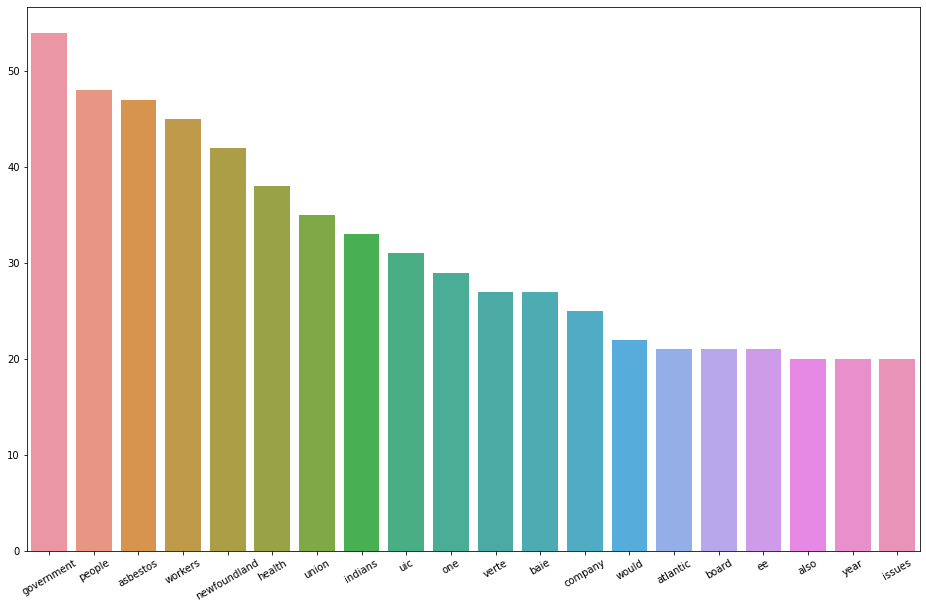

government      54
people          48
asbestos        47
workers         45
newfoundland    42
health          38
union           35
indians         33
uic             31
one             29
verte           27
baie            27
company         25
would           22
atlantic        21
board           21
ee              21
also            20
year            20
issues          20
dtype: int64

In [ ]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = nltk.FreqDist(token_words).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(16,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

plt.savefig("top_20_tokens.png")
plt.show()

all_fdist.to_csv("top_20_tokens.csv")
all_fdist

## That's it!
You get the following from this notebook that can be used for further analysis:
- all_fdist.csv for the top twenty most frequent words
- all_fdist.png bar chart showing the top twenty most frequent words 
- joined word lists for the tokens, stemmed tokens, and lemmatized tokens as the text of the entire document saved as a continuous text
- the out.txt which is the original, unmodified text as interpreted by the OCR engine. This preserves the original structure and may be useful in certain analysis. 
<br>
<br>
Further analysis can compare the terms found in this article to others and rank them in importance, such as TF-IDF. Or the documents can be analyzed for topics and those topics compared against other documents using LDA with Spacey and Gensim. 

**If you are ready to process another pdf,** then you should MOVE
all of these files you just created to a new directory, leaving your working directory empty. Otherwise, they will be overwritten!

**Download the next pdf from GitHub**, (or whereever you may have them.) And place the new pdf in your working directory. 

Repeat Steps 3 thru 8 for each new pdf. 